In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [3]:
def min_max_scaler(data):
    min_val = data.min()
    max_val = data.max()
    return (data - min_val) / (max_val - min_val)

def standard_scaler(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std

In [4]:
path = "prep1.csv"
df = pd.read_csv(path, index_col=0)
yindex = df.columns.values.tolist().index('rain_sum (mm)')
ytrainmax = df.iloc[:,yindex].max()
y = df.iloc[:,yindex]
Xtrain = df.drop(columns='rain_sum (mm)')

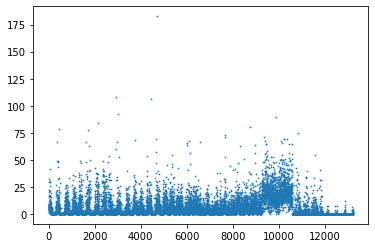

In [5]:
columnnew = {}
for i,column in enumerate(Xtrain.columns):
    columnnew[column] = min_max_scaler(Xtrain[column])

X = pd.DataFrame(columnnew)
X.head()
plt.scatter(X.index,y,s=0.5)

In [13]:
#test pred
test = "preptest1.csv"
df = pd.read_csv(test, index_col=0)
columnnew = {}
for i,column in enumerate(df.columns):
    columnnew[column] = (df[column] - Xtrain[column].min()) / (Xtrain[column].max() - Xtrain[column].min())

xpred = pd.DataFrame(columnnew)
xpred.head()

,snowfall_sum (cm),windgusts_10m_max (km/h),et0_fao_evapotranspiration (mm),elevation,daysince,sinday,cosday,sindmo,cosdmo,year,...,diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windgusts_10m (km/h),vapor_pressure_deficit (kPa),temp_2m_diff,app_temp_diff,soil_temp,soil_moist,windspeed,winddirect
0,0.0,0.082516,0.583990,0.0,0.722745,0.862862,0.844083,0.466245,0.001141,0.75,...,0.245060,0.368937,0.104309,0.681473,0.380682,0.468208,0.944881,0.177899,0.078977,0.363381
1,0.0,0.120915,0.566929,0.0,0.723298,0.924867,0.763876,0.457824,0.001782,0.75,...,0.278219,0.338773,0.133813,0.608060,0.335227,0.381503,0.942959,0.178745,0.109928,0.408671
2,0.0,0.209150,0.620735,0.0,0.723852,0.969479,0.672813,0.449416,0.002565,0.75,...,0.245287,0.375391,0.182309,0.590810,0.375000,0.335260,0.943974,0.176360,0.188242,0.353511
3,0.0,0.183007,0.650919,0.0,0.724405,0.994869,0.574623,0.441022,0.003491,0.75,...,0.230979,0.403301,0.183064,0.586196,0.340909,0.300578,0.943231,0.174411,0.180244,0.351137
4,0.0,0.244281,0.654856,0.0,0.724958,1.000000,0.473324,0.432644,0.004558,0.75,...,0.259369,0.384992,0.227553,0.562527,0.301136,0.225434,0.942125,0.172437,0.237438,0.302411


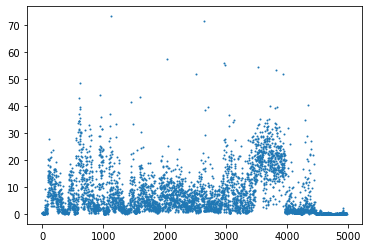

In [15]:
testpred = mlp.predict(xpred)
predictions = pd.DataFrame(list(map(lambda x: x if x > 0 else 0, testpred)))
plt.scatter(range(len(predictions)),predictions,s = 1)
predictions.to_csv('pred4.csv')

In [6]:
def nn(X,y,hidden,iter,lrate,solv='adam',act='tanh',b1=0.9,b2=0.9):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Create an instance of the MLPRegressor
    mlp = MLPRegressor(hidden_layer_sizes=(hidden), max_iter=iter, random_state=0,solver=solv,activation=act,
    learning_rate_init=lrate, beta_1=b1, beta_2=b2, alpha=0.001)
    # mlp = MLPClassifier(hidden_layer_sizes=(30,7), max_iter=1000, random_state=0,solver='adam',activation='logistic',learning_rate_init=0.0001)

    # Train the model on the training data
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    y_predtrain = mlp.predict(X_train)

    # Calculate the MSE on the test set
    msetrain = mean_squared_error(y_train, y_predtrain)
    # print('mse train: ',msetrain)

    mse = mean_squared_error(y_test, y_pred)
    # print('mse test: ',mse)

    epoch = range(mlp.n_iter_)
    # plt.plot(epoch, mlp.loss_curve_)

    loss = mlp.loss_
    # print('loss = ',loss)

    r_squared = mlp.score(X_test, y_test)
    # print ('R2 = ', r_squared)

    return mse

mse train:  22.374233069266158
mse test:  24.047684534022853
loss =  11.730804133099255
R2 =  0.7004484591023659


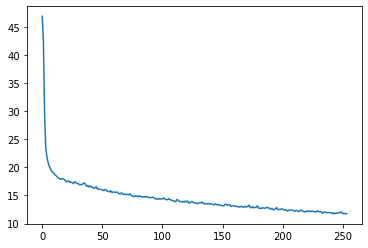

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create an instance of the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(75,50), max_iter=10000, random_state=0,solver='sgd',activation='logistic',
learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.001)
# mlp = MLPClassifier(hidden_layer_sizes=(30,7), max_iter=1000, random_state=0,solver='adam',activation='logistic',learning_rate_init=0.0001)

# Train the model on the training data
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
y_predtrain = mlp.predict(X_train)

# Calculate the MSE on the test set
msetrain = mean_squared_error(y_train, y_predtrain)
print('mse train: ',msetrain)

mse = mean_squared_error(y_test, y_pred)
print('mse test: ',mse)

epoch = range(mlp.n_iter_)
plt.plot(epoch, mlp.loss_curve_)

loss = mlp.loss_
print('loss = ',loss)

r_squared = mlp.score(X_test, y_test)
print ('R2 = ', r_squared)


mse test:  21.00882810649002
loss =  10.85919434072516
R2 =  0.7600353211556761


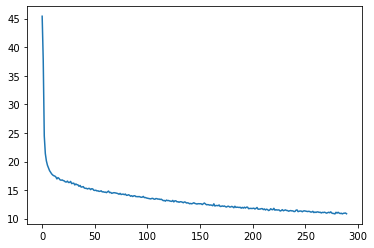

In [11]:
mlp.fit(X,y)

ypred = mlp.predict(X)

# Calculate the MSE on the test set
mse = mean_squared_error(y, ypred)
print('mse test: ',mse)

epoch = range(mlp.n_iter_)
plt.plot(epoch, mlp.loss_curve_)

loss = mlp.loss_
print('loss = ',loss)

r_squared = mlp.score(X_test, y_test)
print ('R2 = ', r_squared)

In [ ]:

# mlp = MLPRegressor(hidden_layer_sizes=(75,50), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.001) , mse test:  24.658823826437942
# mlp = MLPRegressor(hidden_layer_sizes=(75,50), max_iter=10000, random_state=0,solver='adam',activation='tanh',
# learning_rate_init=0.001, beta_1=0.9, beta_2=0.9, alpha=0.001) , mse train:  19.68854371513506
# mlp = MLPRegressor(hidden_layer_sizes=(75,50), max_iter=10000, random_state=0,solver='adam',activation='tanh',
# learning_rate_init=0.001, beta_1=0.5, beta_2=0.5, alpha=0.001) , R2 =  0.677642059871634
# mlp = MLPRegressor(hidden_layer_sizes=(75,50), max_iter=10000, random_state=0,solver='adam',activation='tanh',
# learning_rate_init=0.001, beta_1=0.9, beta_2=0.9, alpha=0.001) , R2 =  0.6928357628992439
# mlp = MLPRegressor(hidden_layer_sizes=(75,50), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.003, beta_1=0.9, beta_2=0.9, alpha=0.001) , R2 =  0.7004298674020941
# mlp = MLPRegressor(hidden_layer_sizes=(75,50), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.001) , R2 =  0.7021695958946372
# mlp = MLPRegressor(hidden_layer_sizes=(100,45,30), max_iter=10000, random_state=0,solver='adam',activation='relu',
# learning_rate_init=0.004, beta_1=0.9, beta_2=0.9, alpha=0.001) , R2 =  0.7125623765243763
# mlp = MLPRegressor(hidden_layer_sizes=(50,35), max_iter=10000, random_state=0,solver='adam',activation='logistic',
# learning_rate_init=0.005, beta_1=0.9, beta_2=0.9, alpha=0.001) , R2 =  0.6413054718738449 , y=1/10


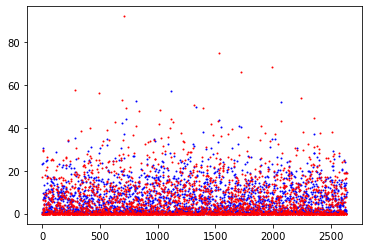

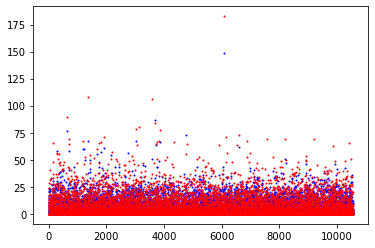

In [12]:
plt.scatter(range(len(y_pred)),y_pred,s=1,c='blue')
plt.scatter(range(len(y_test)),y_test,s=1,c='red')
plt.show()
plt.scatter(range(len(y_predtrain)),y_predtrain,s=1,c='blue')
plt.scatter(range(len(y_train)),y_train,s=1,c='red')
plt.show()

23.394917530591037

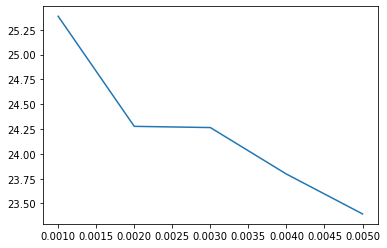

In [83]:
num_neuron = [0.001,0.002,0.003,0.004,0.005]
mselist = []
for n in num_neuron :
    mselist.append(nn(X,y,(90,50,25),10000,n,b1=0.9,b2=0.9,act='logistic'))

plt.plot(num_neuron,mselist)
min(mselist)

[199.4187707113883,
 26.628946773919367,
 25.87189292702084,
 25.850384672624404,
 23.07519190800341]

In [54]:
100,45,30 
0.004

(100, 45, 30)